In [1]:
import pandas as pd

df = pd.read_json("hf://datasets/MongoDB/embedded_movies/sample_mflix.embedded_movies.json")

/Users/finnfreiheit/code/visualise_rag/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df.head()

,plot,genres,runtime,cast,num_mflix_comments,poster,title,fullplot,languages,directors,writers,awards,imdb,countries,type,plot_embedding,rated,metacritic
0,Young Pauline is left a lot of money when her ...,[Action],199.0,"[Pearl White, Crane Wilbur, Paul Panzer, Edwar...",0,https://m.media-amazon.com/images/M/MV5BMzgxOD...,The Perils of Pauline,Young Pauline is left a lot of money when her ...,[English],"[Louis J. Gasnier, Donald MacKenzie]","[Charles W. Goddard (screenplay), Basil Dickey...","{'wins': 1, 'nominations': 0, 'text': '1 win.'}","{'rating': 7.6, 'votes': 744, 'id': 4465}",[USA],movie,"[0.0007293965299999999, -0.026834568000000003,...",NaN,NaN
1,A penniless young man tries to save an heiress...,"[Comedy, Short, Action]",22.0,"[Harold Lloyd, Mildred Davis, 'Snub' Pollard, ...",0,https://m.media-amazon.com/images/M/MV5BNzE1OW...,From Hand to Mouth,As a penniless man worries about how he will m...,[English],"[Alfred J. Goulding, Hal Roach]",[H.M. Walker (titles)],"{'wins': 0, 'nominations': 1, 'text': '1 nomin...","{'rating': 7, 'votes': 639, 'id': 10146}",[USA],movie,"[-0.022837115, -0.022941574000000003, 0.014937...",TV-G,NaN
2,"Michael ""Beau"" Geste leaves England in disgrac...","[Action, Adventure, Drama]",101.0,"[Ronald Colman, Neil Hamilton, Ralph Forbes, A...",0,NaN,Beau Geste,"Michael ""Beau"" Geste leaves England in disgrac...",[English],[Herbert Brenon],"[Herbert Brenon (adaptation), John Russell (ad...","{'wins': 1, 'nominations': 0, 'text': '1 win.'}","{'rating': 6.9, 'votes': 222, 'id': 16634}",[USA],movie,"[0.00023330492999999998, -0.028511643000000003...",NaN,NaN
3,"Seeking revenge, an athletic young man joins t...","[Adventure, Action]",88.0,"[Billie Dove, Tempe Pigott, Donald Crisp, Sam ...",1,https://m.media-amazon.com/images/M/MV5BMzU0ND...,The Black Pirate,A nobleman vows to avenge the death of his fat...,NaN,[Albert Parker],"[Douglas Fairbanks (story), Jack Cunningham (a...","{'wins': 1, 'nominations': 0, 'text': '1 win.'}","{'rating': 7.2, 'votes': 1146, 'id': 16654}",[USA],movie,"[-0.005927917, -0.033394486, 0.0015323418, -0....",NaN,NaN
4,An irresponsible young millionaire changes his...,"[Action, Comedy, Romance]",58.0,"[Harold Lloyd, Jobyna Ralston, Noah Young, Jim...",0,https://m.media-amazon.com/images/M/MV5BMTcxMT...,For Heaven's Sake,"The Uptown Boy, J. Harold Manners (Lloyd) is a...",[English],[Sam Taylor],"[Ted Wilde (story), John Grey (story), Clyde B...","{'wins': 0, 'nominations': 1, 'text': '1 nomin...","{'rating': 7.6, 'votes': 918, 'id': 16895}",[USA],movie,"[-0.0059373598, -0.026604708, -0.0070914757000...",PASSED,NaN


In [11]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import numpy as np

X = np.vstack(df["plot_embedding"])
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
X_tsne = tsne.fit_transform(X)

fig, px = plt.subplots(figsize=(10,8))

px.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1])
fig.update_layout(
    title="t-SNE visualization of Custom Classification dataset",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1536 and the array at index 42 has size 1

In [12]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load your data
df = pd.read_json("hf://datasets/MongoDB/embedded_movies/sample_mflix.embedded_movies.json")

# Extract embeddings (assuming 'plot_embedding' contains lists or numpy arrays)
embeddings = np.array(df["plot_embedding"].tolist())

# Check the shape of embeddings
print(f"Shape of embeddings: {embeddings.shape}")

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=1000)
embeddings_2d = tsne.fit_transform(embeddings)

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], alpha=0.6, s=10)
plt.title("t-SNE Visualization of Plot Embeddings")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (1500,) + inhomogeneous part.

In [13]:
# Display the first few rows of the column
print(df['plot_embedding'].head())

# Check if all elements are lists and have the same length
print(df['plot_embedding'].apply(lambda x: isinstance(x, list) and len(x) if isinstance(x, list) else 0).value_counts())


0    [0.0007293965299999999, -0.026834568000000003,...
1    [-0.022837115, -0.022941574000000003, 0.014937...
2    [0.00023330492999999998, -0.028511643000000003...
3    [-0.005927917, -0.033394486, 0.0015323418, -0....
4    [-0.0059373598, -0.026604708, -0.0070914757000...
Name: plot_embedding, dtype: object
plot_embedding
1536    1472
0         28
Name: count, dtype: int64


In [14]:
# Remove rows where plot_embedding is not a list or has an invalid length
valid_length = 1536  # Length of embeddings for OpenAI text-embedding-ada-002
df = df[df['plot_embedding'].apply(lambda x: isinstance(x, list) and len(x) == valid_length)]


In [15]:
import numpy as np

# Convert the plot_embedding column into a numpy array
embeddings = np.array(df['plot_embedding'].tolist())
print(f"Shape of embeddings: {embeddings.shape}")


Shape of embeddings: (1472, 1536)


/Users/finnfreiheit/code/visualise_rag/.venv/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


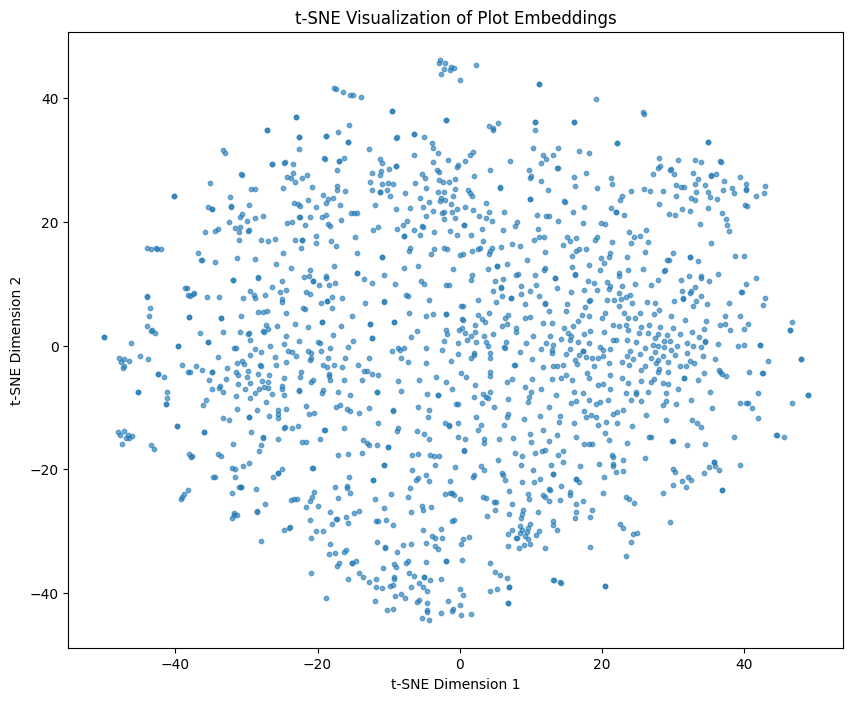

In [16]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=1000)
embeddings_2d = tsne.fit_transform(embeddings)

# Plot the result
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], alpha=0.6, s=10)
plt.title("t-SNE Visualization of Plot Embeddings")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()


/Users/finnfreiheit/code/visualise_rag/.venv/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


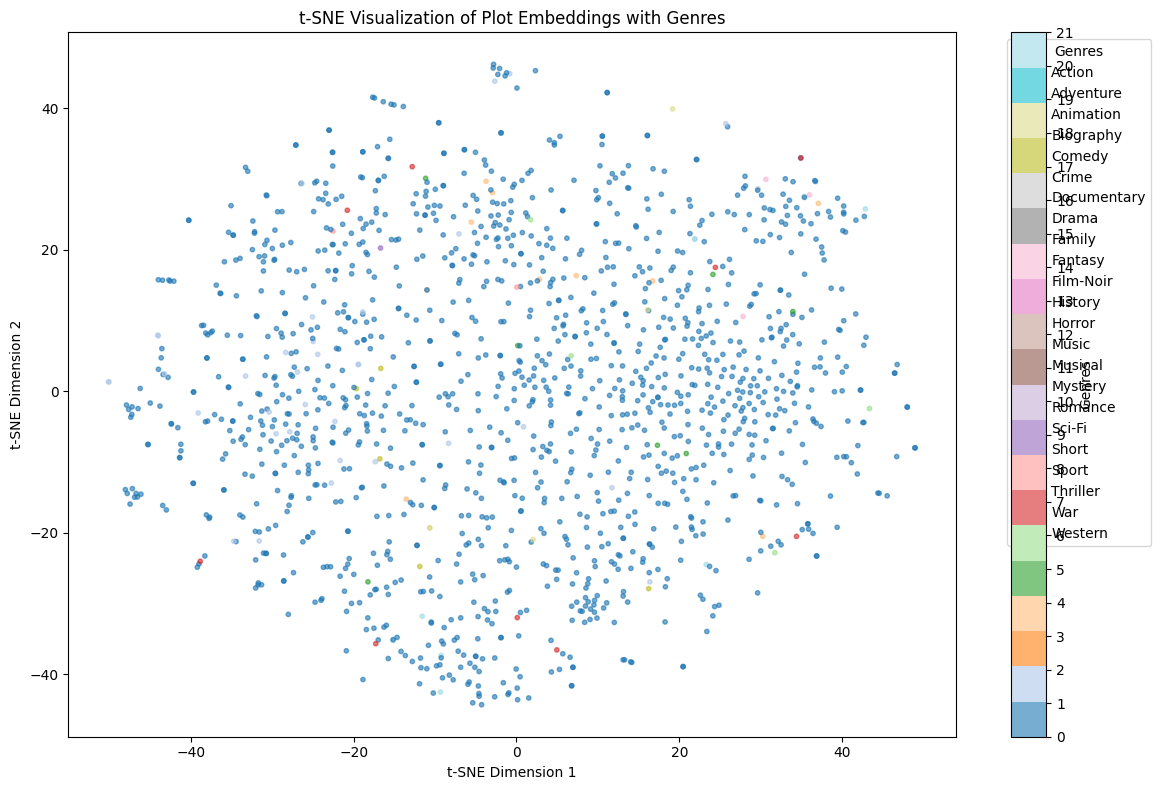

In [17]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Load your data
df = pd.read_json("hf://datasets/MongoDB/embedded_movies/sample_mflix.embedded_movies.json")

# Filter valid embeddings
valid_length = 1536  # Embedding length for OpenAI's ada-002
df = df[df['plot_embedding'].apply(lambda x: isinstance(x, list) and len(x) == valid_length)]

# Extract embeddings and genres
embeddings = np.array(df['plot_embedding'].tolist())
genres = df['genres']

# Create a mapping for genres
unique_genres = sorted(set(g for genre_list in genres for g in genre_list))
genre_to_int = {genre: idx for idx, genre in enumerate(unique_genres)}

# Assign a primary genre to each movie for visualization (first genre in the list, for simplicity)
primary_genres = genres.apply(lambda x: x[0] if x else "Unknown")
genre_labels = primary_genres.map(genre_to_int)

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=1000)
embeddings_2d = tsne.fit_transform(embeddings)

# Plot with colors
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    embeddings_2d[:, 0], embeddings_2d[:, 1],
    c=genre_labels, cmap='tab20', alpha=0.6, s=10
)
plt.colorbar(scatter, ticks=range(len(unique_genres)), label="Genres")
plt.title("t-SNE Visualization of Plot Embeddings with Genres")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")

# Add a legend for genres
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(idx / len(unique_genres)), markersize=10, label=genre)
    for idx, genre in enumerate(unique_genres)
]
plt.legend(handles=legend_elements, title="Genres", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
